**Bước 0: Cài đặt thư viện và import**
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install scikit-learn (sklearn)
- pip install pickle (nếu lỗi version thì pip install pickle5)
- pip install yfinance (data về chứng khoán)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

**Bước 1: Đọc DATA và khám phá dữ liệu (Công ty Apple)**


In [ ]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'AAPL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-01-01', end='2025-08-15', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2003-01-02,0.222149,0.264286,0.266429,0.256250,0.256429,181428800
2003-01-03,0.223650,0.266071,0.266607,0.260536,0.264286,147453600
2003-01-06,0.223650,0.266071,0.274643,0.265714,0.268393,390532800
2003-01-07,0.222900,0.265179,0.267857,0.258393,0.264107,342344800
2003-01-08,0.218396,0.259821,0.262679,0.257857,0.260357,229644800
...,...,...,...,...,...,...
2025-08-08,229.090012,229.350006,231.000000,219.250000,220.830002,113854000
2025-08-11,227.179993,227.179993,229.559998,224.759995,227.919998,61806100


In [ ]:
df = stock_data.copy()

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5691 entries, 2003-01-02 to 2025-08-14
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5691 non-null   float64
 1   (Close, AAPL)      5691 non-null   float64
 2   (High, AAPL)       5691 non-null   float64
 3   (Low, AAPL)        5691 non-null   float64
 4   (Open, AAPL)       5691 non-null   float64
 5   (Volume, AAPL)     5691 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 311.2 KB


In [ ]:
# Những feature của tập dữ liệu
stock_data.keys()

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

**Bước 2: Kiểm tra và tiền xử lý dữ liệu(nếu có)**

In [ ]:
stock_data.shape
# kích thước dữ liệu

(5691, 6)

In [ ]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

,,0
Price,Ticker,
Adj Close,AAPL,float64
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,int64


In [ ]:
stock_data.isnull().sum()
#check missing value

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [ ]:
# Kiểm tra có dòng trùng lặp hay không (True/False)
print(stock_data.duplicated().sum())

0


**Ta thấy tập dữ liệu này khá là sạch**

**Bước 3: Phân tích mô tả**

1. Bảng thống kê mô tả

In [ ]:
# Thống kê mô tả về tập dữ liệu
description = stock_data.describe()
mode = stock_data.select_dtypes(include=["number"]).mode().iloc[0]
mode.name = "mode"
median = stock_data.select_dtypes(include=["number"]).median()
median.name = "median"
description = description._append(mode)
description = description._append(median)
description

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5.691000e+03
mean,51.246936,52.994531,53.529014,52.408652,52.951622,3.767377e+08
std,67.003658,67.231000,67.897818,66.486354,67.156701,3.865642e+08
min,0.196932,0.234286,0.235536,0.227143,0.231964,2.323470e+07
25%,4.230885,5.033393,5.125715,4.979107,5.042678,1.013536e+08
50%,19.955919,22.965000,23.127144,22.719999,22.962500,2.334584e+08
75%,63.485737,65.638752,66.332500,65.189999,65.662498,5.290194e+08
max,258.103729,259.019989,260.100006,257.630005,258.190002,3.372970e+09
mode,0.215695,0.256607,0.383929,0.256250,0.256429,9.095670e+07


2. Vẽ biểu đồ cột

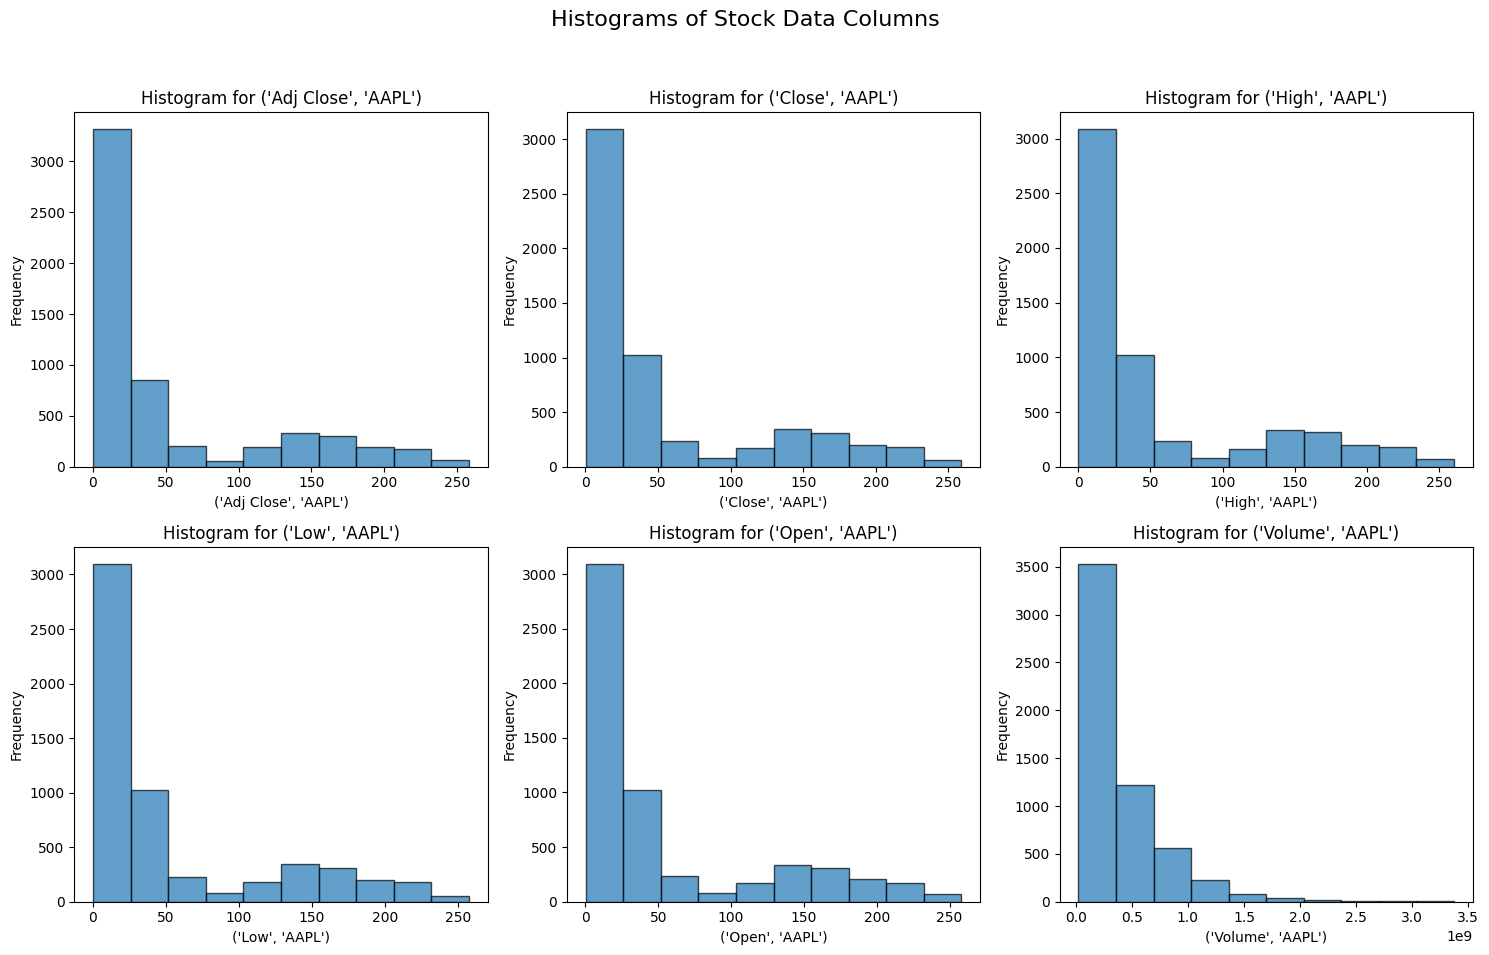

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()

3. Biểu đồ hộp

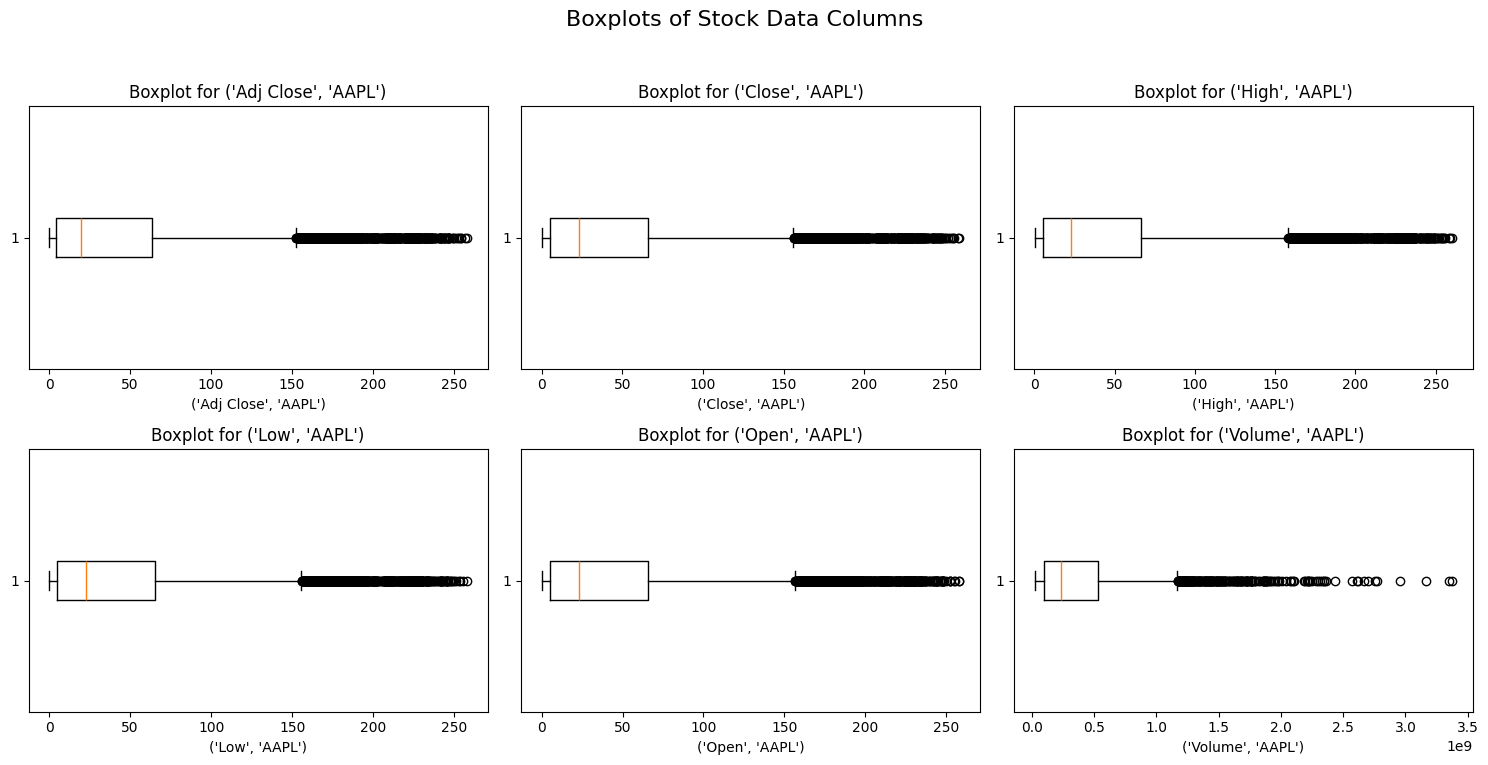

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()

4. Biểu đồ Heatmap

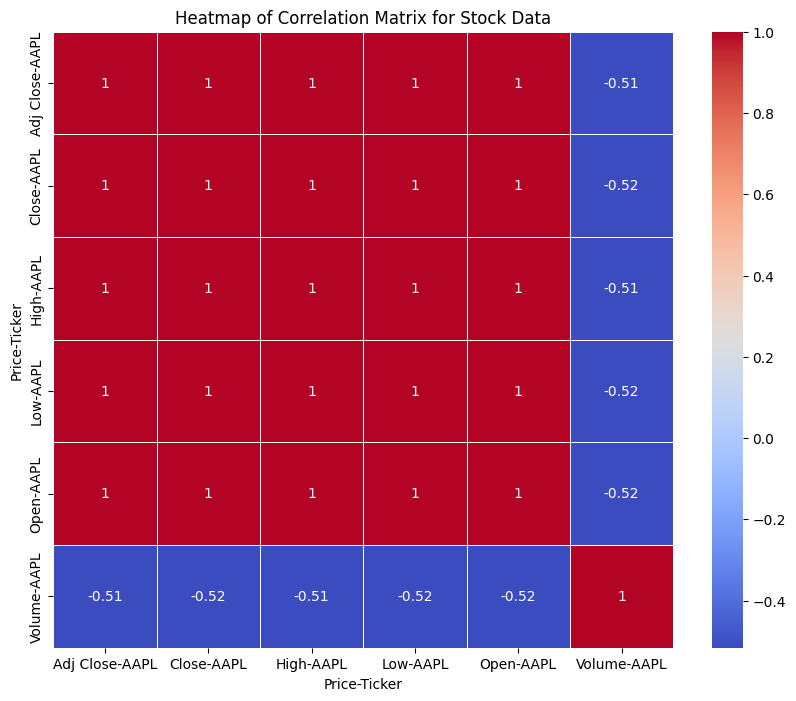

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()

5. Biểu đồ scatter

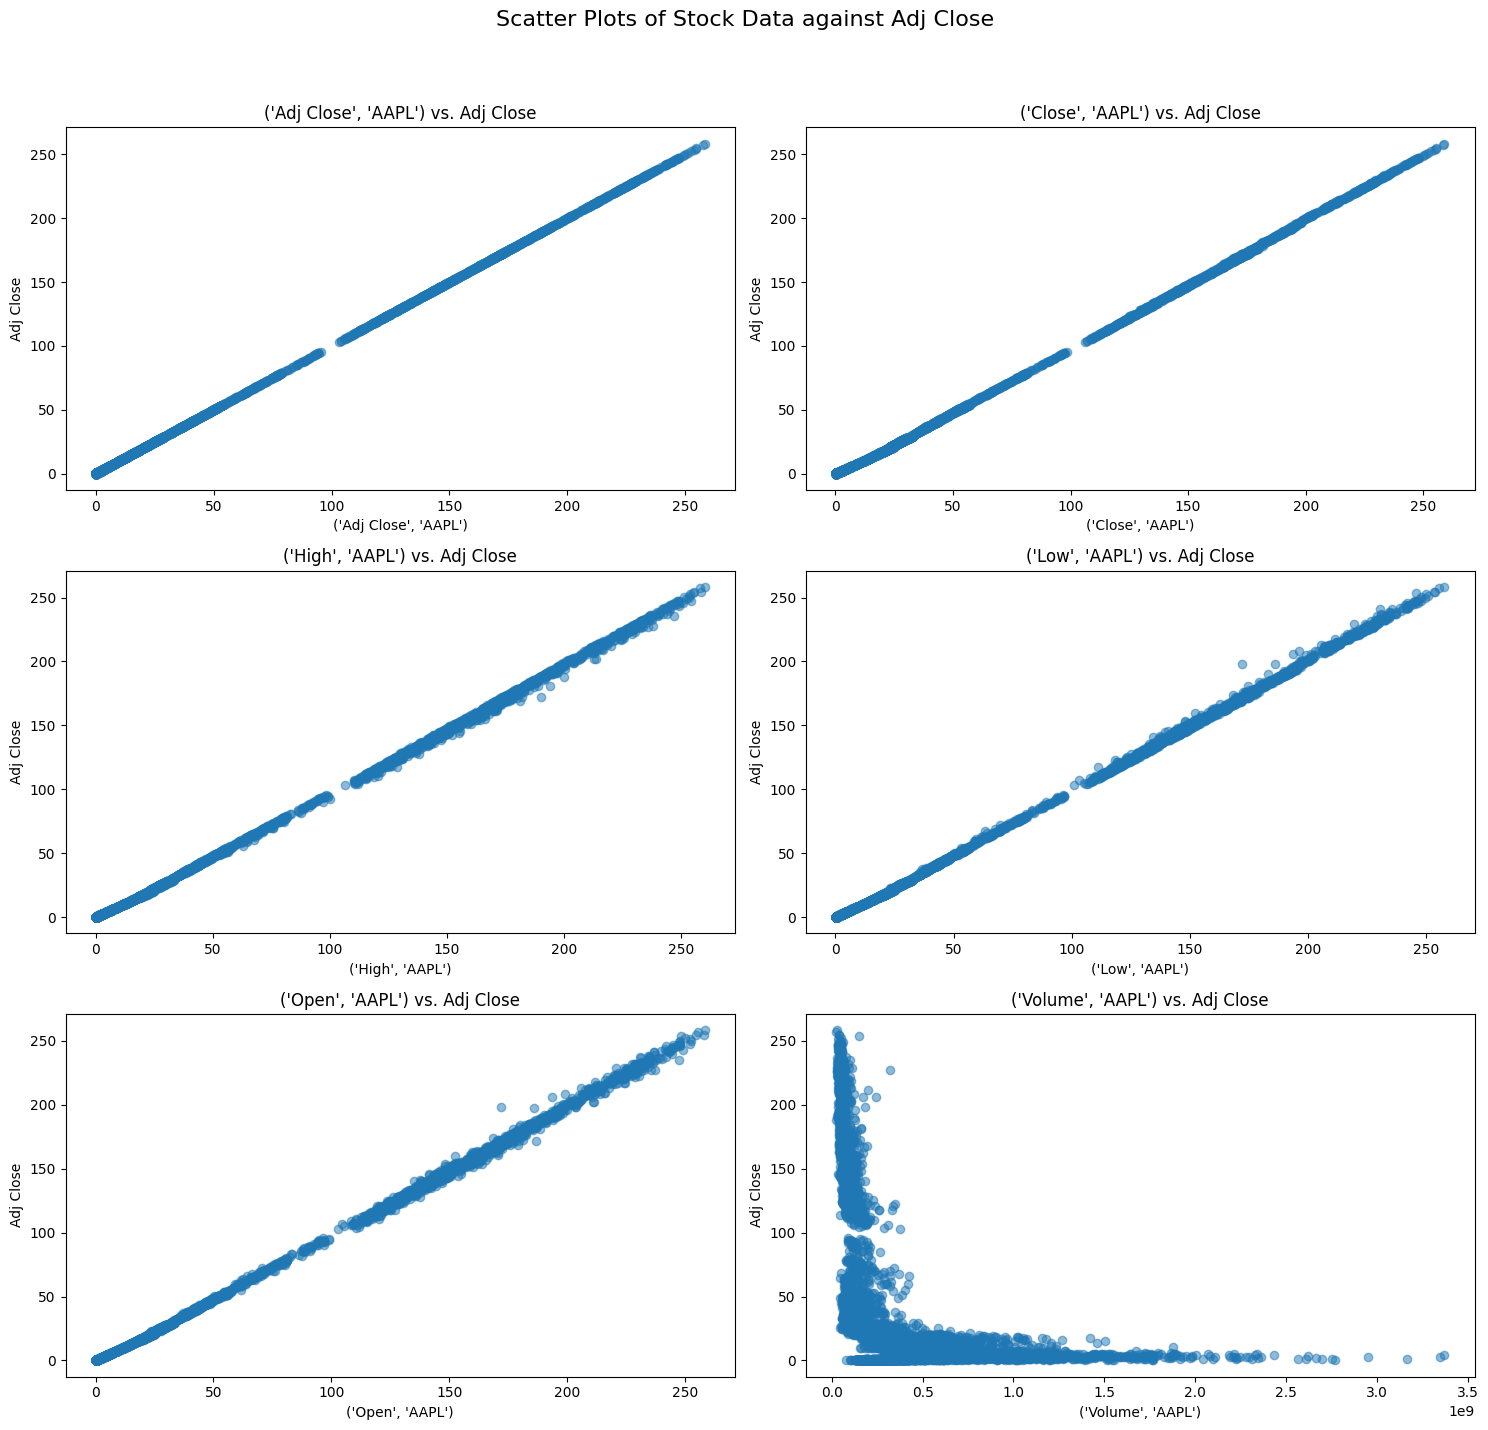

In [ ]:
# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, Hight, Low, Close.
Vì thế nên ta sẽ chia tập X, Y như sau:

In [ ]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (Y)
Y = stock_data['Adj Close']
Y

Ticker,AAPL
Date,
2003-01-02,0.222149
2003-01-03,0.223650
2003-01-06,0.223650
2003-01-07,0.222900
2003-01-08,0.218396
...,...
2025-08-08,229.090012
2025-08-11,227.179993
2025-08-12,229.649994


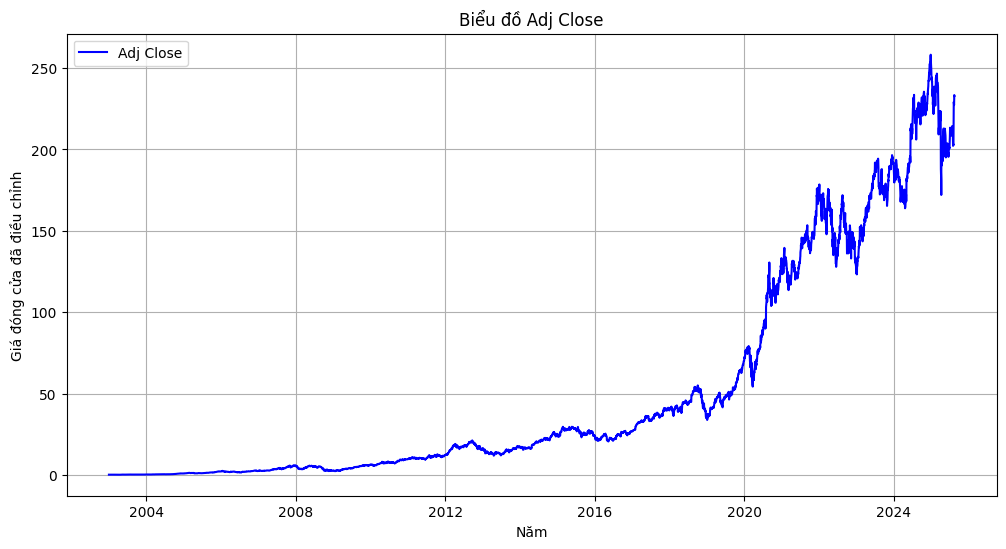

In [ ]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, Y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (X)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2003-01-02,0.264286,0.266429,0.256250,0.256429
2003-01-03,0.266071,0.266607,0.260536,0.264286
2003-01-06,0.266071,0.274643,0.265714,0.268393
2003-01-07,0.265179,0.267857,0.258393,0.264107
2003-01-08,0.259821,0.262679,0.257857,0.260357
...,...,...,...,...
2025-08-08,229.350006,231.000000,219.250000,220.830002
2025-08-11,227.179993,229.559998,224.759995,227.919998


Thay vì sử dụng chỉ số (index) là số thứ tự thì ta sẽ dùng ngày tháng. Do không ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự.

**Bước 4: Phân tích dự báo**

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

X_train:  (4552, 4)
X_test:  (1139, 4)
Y_train:  (4552, 1)
Y_test:  (1139, 1)


In [ ]:
X_train

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2003-01-02,0.264286,0.266429,0.256250,0.256429
2003-01-03,0.266071,0.266607,0.260536,0.264286
2003-01-06,0.266071,0.274643,0.265714,0.268393
2003-01-07,0.265179,0.267857,0.258393,0.264107
2003-01-08,0.259821,0.262679,0.257857,0.260357
...,...,...,...,...
2021-01-26,143.160004,144.300003,141.369995,143.600006
2021-01-27,142.059998,144.300003,140.410004,143.429993


In [ ]:
X_test

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2021-02-02,134.990005,136.309998,134.610001,135.729996
2021-02-03,133.940002,135.770004,133.610001,135.759995
2021-02-04,137.389999,137.399994,134.589996,136.300003
2021-02-05,136.759995,137.419998,135.860001,137.350006
2021-02-08,136.910004,136.960007,134.919998,136.029999
...,...,...,...,...
2025-08-08,229.350006,231.000000,219.250000,220.830002
2025-08-11,227.179993,229.559998,224.759995,227.919998


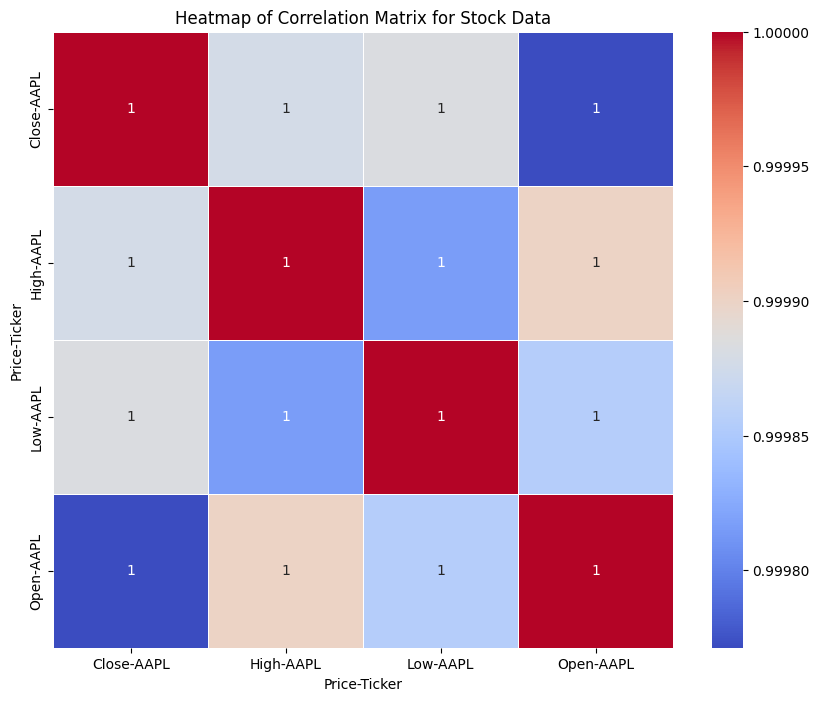

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()

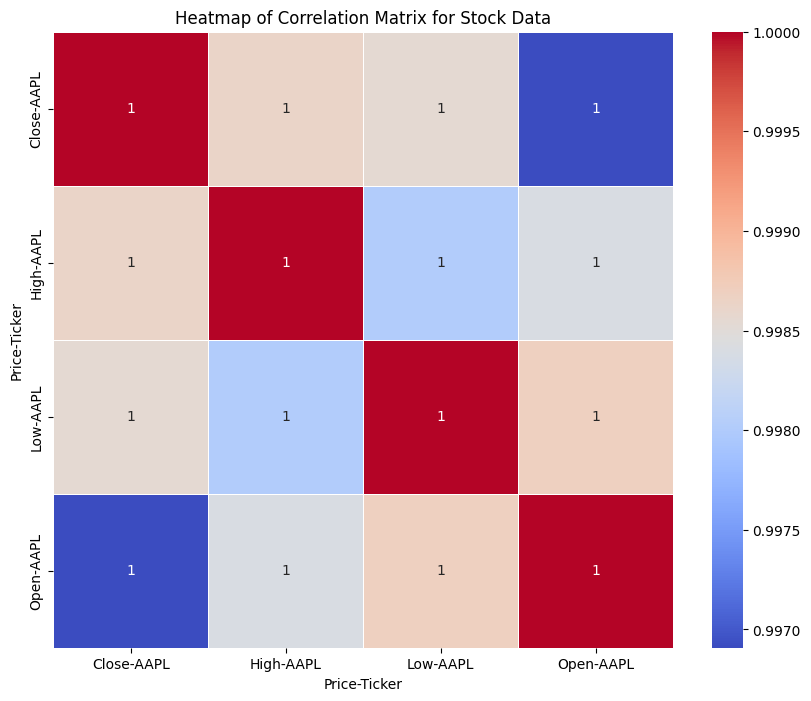

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_test.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()

Mối quan hệ tương quan giữa các biến trong train và test tương tự nhau (không bị dịch chuyển nhiều).

In [ ]:
Y_train

Ticker,AAPL
Date,
2003-01-02,0.222149
2003-01-03,0.223650
2003-01-06,0.223650
2003-01-07,0.222900
2003-01-08,0.218396
...,...
2021-01-26,139.494537
2021-01-27,138.422684
2021-01-28,133.579971


In [ ]:
Y_test

Ticker,AAPL
Date,
2021-02-02,131.533737
2021-02-03,130.510574
2021-02-04,133.872284
2021-02-05,133.457520
2021-02-08,133.603882
...,...
2025-08-08,229.090012
2025-08-11,227.179993
2025-08-12,229.649994


Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("/content/drive/MyDrive/PhanVanKiet_Scaler/Scaler_Apple.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [ ]:
X_train, X_train.shape

(array([[2.09899356e-04, 2.13269324e-04, 2.06223617e-04, 1.70644583e-04],
        [2.22388223e-04, 2.14498002e-04, 2.36589953e-04, 2.25447763e-04],
        [2.22388223e-04, 2.69974495e-04, 2.73276221e-04, 2.54094304e-04],
        ...,
        [9.57530335e-01, 9.78599272e-01, 9.66912967e-01, 9.71541762e-01],
        [9.21637637e-01, 9.42355998e-01, 9.20931253e-01, 9.45803792e-01],
        [9.36890264e-01, 9.32967259e-01, 9.26032369e-01, 9.31295664e-01]]),
 (4552, 4))

In [ ]:
X_test, X_test.shape

(array([[0.94283745, 0.93938745, 0.9521053 , 0.94510624],
        [0.93549096, 0.93565961, 0.94502028, 0.94531549],
        [0.95962935, 0.94691222, 0.95196357, 0.94908208],
        ...,
        [1.60513945, 1.59169739, 1.60718634, 1.58876432],
        [1.63088715, 1.62069199, 1.63099191, 1.61010808],
        [1.62703897, 1.62152038, 1.63396771, 1.63096343]]),
 (1139, 4))

**Huấn luyện mô hình**

In [ ]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train) # fit chính là hàm đào tạo

LinearRegression()

**Đánh giá mô hình**

In [ ]:
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [ ]:
Y_pred = model.predict(X_test) #dự báo Y_pred dựa trên tập X_test
Y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(Y_test, Y_pred, Y_train, Y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    mae_train = mean_absolute_error(Y_train, Y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(Y_train, Y_pred_train)
    mape_train = mean_absolute_percentage_error(Y_train, Y_pred_train)


    print(f"MAE: {mae_train:}")
    print(f"MSE: {mse_train:}")
    print(f"RMSE: {rmse_train:}")
    print(f"MAPE: {mape_train:}")
    print(f"R-squared (R2): {r2_train:}")


    print('--------Kết quả trên dữ liệu thẩm định (test)-------')
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    mape = mean_absolute_percentage_error(Y_test, Y_pred)


    print(f"MAE: {mae:}")
    print(f"MSE: {mse:}")
    print(f"RMSE: {rmse:}")
    print(f"MAPE: {mape:}")
    print(f"R-squared (R2): {r2:}")

In [ ]:
Y_pred.shape

(1139, 1)

In [ ]:
Y_test.shape

(1139, 1)

In [ ]:
rate(Y_test, Y_pred, Y_train, Y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
MAE: 0.6941063501965837
MSE: 0.6559476066079636
RMSE: 0.8099059245418344
MAPE: 0.40872973116257183
R-squared (R2): 0.9989311305725588
--------Kết quả trên dữ liệu thẩm định (test)-------
MAE: 4.357175858894116
MSE: 22.934065675369844
RMSE: 4.788952461172468
MAPE: 0.02400100535559481
R-squared (R2): 0.9800241007359942


In [ ]:
from sklearn.model_selection import GridSearchCV

# Ridge
params_ridge = {'alpha': [0.001,0.01,0.1,1,10]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, params_ridge, cv=10)
grid_ridge.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
# Lasso
params_lasso = {'alpha':[0.001,0.01,0.1,1,10]}
lasso = Lasso(max_iter=5000)
grid_lasso = GridSearchCV(lasso, params_lasso, cv=10)
grid_lasso.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=5000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
# Những mô hình khác để đánh giá
model_Ridge = Ridge(alpha=10)
model_Lasso = Lasso(alpha=0.1, max_iter=5000)

model_Ridge.fit(X_train, Y_train)
model_Lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, max_iter=5000)

In [ ]:
Y_pred_Ridge = model_Ridge.predict(X_test)
Y_pred_Ridge_train = model_Ridge.predict(X_train)

In [ ]:
print('--------Hồi quy Ridge-------')
rate(Y_test, Y_pred_Ridge, Y_train, Y_pred_Ridge_train)

--------Hồi quy Ridge-------
--------Kết quả trên dữ liệu huấn luyện-------
MAE: 0.7195147773154985
MSE: 0.9411897865050765
RMSE: 0.9701493629875125
MAPE: 0.275985880724913
R-squared (R2): 0.9984663272217464
--------Kết quả trên dữ liệu thẩm định (test)-------
MAE: 6.704405016341591
MSE: 51.97599019211024
RMSE: 7.2094375780715545
MAPE: 0.03745493832287758
R-squared (R2): 0.9547281690511771


In [ ]:
Y_pred_Lasso = model_Lasso.predict(X_test)
Y_pred_Lasso_train = model_Lasso.predict(X_train)

In [ ]:
print('--------Hồi quy Lasso-------')
rate(Y_test, Y_pred_Lasso, Y_train, Y_pred_Lasso_train)

--------Hồi quy Lasso-------
--------Kết quả trên dữ liệu huấn luyện-------
MAE: 0.7195526721968033
MSE: 0.9971422012570836
RMSE: 0.9985700782904942
MAPE: 0.22818982822643866
R-squared (R2): 0.9983751525228567
--------Kết quả trên dữ liệu thẩm định (test)-------
MAE: 7.510930157862745
MSE: 62.4706900900551
RMSE: 7.903840211571531
MAPE: 0.04214237142414981
R-squared (R2): 0.945587135318442


In [ ]:
print(Y_test)

Ticker            AAPL
Date                  
2021-02-02  131.533737
2021-02-03  130.510574
2021-02-04  133.872284
2021-02-05  133.457520
2021-02-08  133.603882
...                ...
2025-08-08  229.090012
2025-08-11  227.179993
2025-08-12  229.649994
2025-08-13  233.330002
2025-08-14  232.779999

[1139 rows x 1 columns]


In [ ]:
print(Y_pred)

[[129.49869607]
 [128.53711629]
 [132.1535452 ]
 ...
 [221.49595229]
 [225.43282397]
 [224.42755466]]


In [ ]:
Y_test = Y_test.values.ravel()  # Hoặc Y_test = Y_test.flatten()
Y_pred = Y_pred.ravel()  # Hoặc Y_pred = Y_pred.flatten()

df_result = pd.DataFrame({'Actual':Y_test, 'Predicted': Y_pred})
df_compare = df_result.head(50)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
0,131.533737,129.498696
1,130.510574,128.537116
2,133.872284,132.153545
3,133.457520,131.081755
4,133.603882,131.464494
5,132.725662,130.674569
6,132.120605,130.113969
7,131.866867,129.862636
8,132.101089,129.966290
9,129.973770,128.185097


<Axes: >

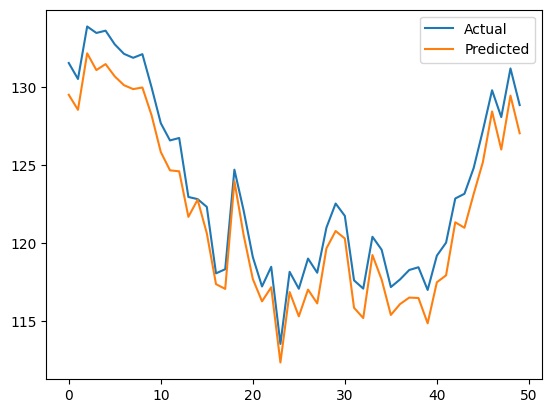

In [ ]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

In [ ]:
Close_Price = 145.55
High_Price = 148.72
Low_Price = 142.3
Open_Price = 144.98

new_data_scaled = minmax_scale.transform([[Close_Price, High_Price, Low_Price, Open_Price]])
predicted = model.predict(new_data_scaled)
print("Kết quả dự báo: ", predicted.item())

Kết quả dự báo:  141.39635285404512


### <font color = "green"> Ta thấy mô hình tốt<font>

# <font color="red">5:Lưu mô hình</font>

In [ ]:
import pickle
# Lưu mô hình vào tệp
with open("/content/drive/MyDrive/PhanVanKiet_Model/Model_Apple.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [ ]:
# --- 2. Tính MA ngắn hạn (MA_20) và dài hạn (MA_50) ---
df["MA_20"] = df["Close"].rolling(window=20).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

# --- 3. Áp dụng chiến lược MA Crossover ---
df["Position"] = 0
df.loc[df["MA_20"] > df["MA_50"], "Position"] = 1   # Tín hiệu mua
df.loc[df["MA_20"] < df["MA_50"], "Position"] = -1  # Tín hiệu bán

# --- 4. Long-only Position ---
df["Position_LO"] = df["Position"].clip(lower=0)
# --- 5. Tính Return và Strategy ---
df["Return"] = df["Close"].pct_change().fillna(0)
df["Strategy_LS"] = df["Position"].shift(1).fillna(0) * df["Return"]
df["Strategy_LO"] = df["Position_LO"].shift(1).fillna(0) * df["Return"]

# --- 6. Cumulative Return ---
df["Cumulative_LS"] = (1 + df["Strategy_LS"]).cumprod()
df["Cumulative_LO"] = (1 + df["Strategy_LO"]).cumprod()

# --- 7. Drawdown LS ---
cum_max_LS = df["Cumulative_LS"].cummax()
df["Drawdown_LS"] = (df["Cumulative_LS"] - cum_max_LS) / cum_max_LS

# --- 8. Drawdown LO ---
cum_ret_LO_pos = df["Cumulative_LO"][df["Position_LO"].shift(1) > 0]
if not cum_ret_LO_pos.empty:
    cum_max_LO_pos = cum_ret_LO_pos.cummax()
    drawdown_LO = (cum_ret_LO_pos - cum_max_LO_pos) / cum_max_LO_pos
    df["Drawdown_LO"] = drawdown_LO.reindex(df.index)
else:
    df["Drawdown_LO"] = float("nan")

# --- 9. Kết quả in ra ---
cum_ret_LS = df["Cumulative_LS"]
cum_ret_LO = df["Cumulative_LO"]
max_drawdown_LS = df["Drawdown_LS"].min()
max_drawdown_LO = df["Drawdown_LO"].min()

In [ ]:
# --- 9. Kết quả in ra ---
cum_ret_LS = df["Cumulative_LS"]
cum_ret_LO = df["Cumulative_LO"]
max_drawdown_LS = df["Drawdown_LS"].min()
max_drawdown_LO = df["Drawdown_LO"].min()

print(
    f"📌 Long/Short: Lợi suất tích lũy = {(cum_ret_LS.iloc[-1] - 1) * 100:.2f}%, "
    f"Max Drawdown = {max_drawdown_LS * 100:.2f}%"
)
print(
    f"📌 Long-only: Lợi suất tích lũy = {(cum_ret_LO.iloc[-1] - 1) * 100:.2f}%, "
    f"Max Drawdown = {max_drawdown_LO * 100:.2f}%"
)

📌 Long/Short: Lợi suất tích lũy = 225.80%, Max Drawdown = -60.93%
📌 Long-only: Lợi suất tích lũy = 9216.49%, Max Drawdown = -41.11%
